In [1]:
N = 23
col1 = N % 5
col2 = N * N % 5 + 5
(col1, col2)

(3, 9)

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit


In [4]:
df = pd.read_csv('datasets/students_simple.csv')
df

,height,mass,income,iq,pages,age,bmi,work_exp,friends,test_time
0,159,45,430,95,24,20,3.533,26,5,8.5
1,160,61,640,115,32,25,2.623,63,7,6.2
2,161,56,610,111,24,28,2.875,94,10,6.8
3,162,48,330,97,24,19,3.375,16,4,12.0
4,162,54,420,105,60,23,3.000,49,2,7.5
5,164,58,290,98,16,20,2.828,14,6,10.0
6,166,51,480,109,90,26,3.255,78,9,7.2
7,169,62,610,120,24,19,2.726,10,5,4.2
8,170,70,840,122,48,30,2.429,130,10,3.5
9,170,72,330,92,24,20,2.361,20,3,9.5


In [39]:
cols = ["height",	"mass",	"income",	"iq",	"pages",	"age"	,"bmi"	,"work_exp",	"friends",	"test_time"]
x = df[cols[col1]]
y = df[cols[col2]]
(x, y)

(0      95
 1     115
 2     111
 3      97
 4     105
 5      98
 6     109
 7     120
 8     122
 9      92
 10    110
 11    102
 12    108
 13    100
 14    104
 15    104
 16    128
 17    106
 18    105
 19    117
 Name: iq, dtype: int64,
 0      8.5
 1      6.2
 2      6.8
 3     12.0
 4      7.5
 5     10.0
 6      7.2
 7      4.2
 8      3.5
 9      9.5
 10     7.8
 11     8.0
 12     6.0
 13     4.8
 14     8.6
 15    10.0
 16     4.5
 17    12.5
 18    10.5
 19     6.5
 Name: test_time, dtype: float64)

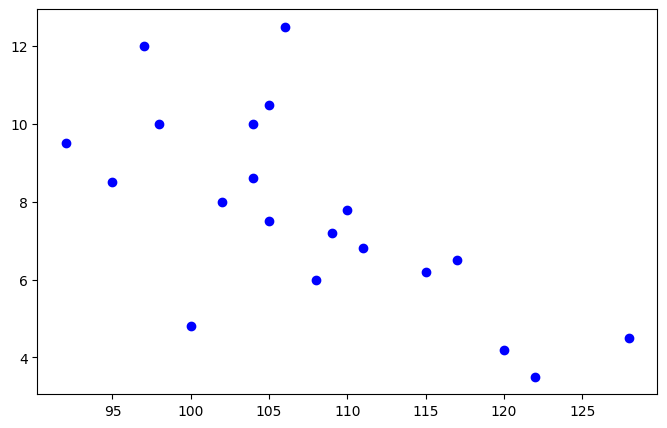

In [77]:
plt.figure(figsize=(8, 5))
plt.plot(x, y, marker='o', linestyle='', color='b', label='Точки (x, y)')
plt.show()

In [48]:
K_fehner = np.sum((np.sign(x - x.mean()) == np.sign(y - y.mean())) * 2 - 1) / n
K_fehner

np.float64(-0.7)

In [50]:
n = x.shape[0]
cov = np.sum((x - x.mean()) *  (y - y.mean())) / (n - 1)

In [51]:
cov

np.float64(-16.16)

In [52]:
S_x = np.sqrt(np.sum((x - x.mean()) * (x - x.mean())) / (n - 1))
S_y = np.sqrt(np.sum((y - y.mean()) * (y - y.mean())) / (n - 1))
K_pirs = cov / S_x / S_y
K_pirs

np.float64(-0.6818137442428809)

In [55]:
T = K * np.sqrt(n - 2) / np.sqrt(1 - K_pirs ** 2)
T

np.float64(5.799714240466432)

In [59]:
def rank_data(data):
    sorted_data = sorted((val, i) for i, val in enumerate(data))
    ranks = np.zeros(data.shape[0])
    for pos, (val, original_index) in enumerate(sorted_data):
        ranks[original_index] = pos + 1
    return ranks



R_x = rank_data(x)
R_y = rank_data(y)
(R_x, R_y)

(array([ 2., 16., 15.,  3.,  9.,  4., 13., 18., 19.,  1., 14.,  6., 12.,
         5.,  7.,  8., 20., 11., 10., 17.]),
 array([13.,  6.,  8., 19., 10., 16.,  9.,  2.,  1., 15., 11., 12.,  5.,
         4., 14., 17.,  3., 20., 18.,  7.]))

In [60]:
K_spir = 1 - 6 / (n - 1) / n / (n + 1) * np.sum((R_x - R_y) ** 2)
K_spir

np.float64(-0.6706766917293234)

In [65]:
K_kendel = 1
for i in range(n):
    for j in range(i + 1, n):
        K_kendel -= 4 / (n - 1) / n * ((x[i] < x[j]) != (y[i] < y[j]))
K_kendel

np.float64(-0.5157894736842111)

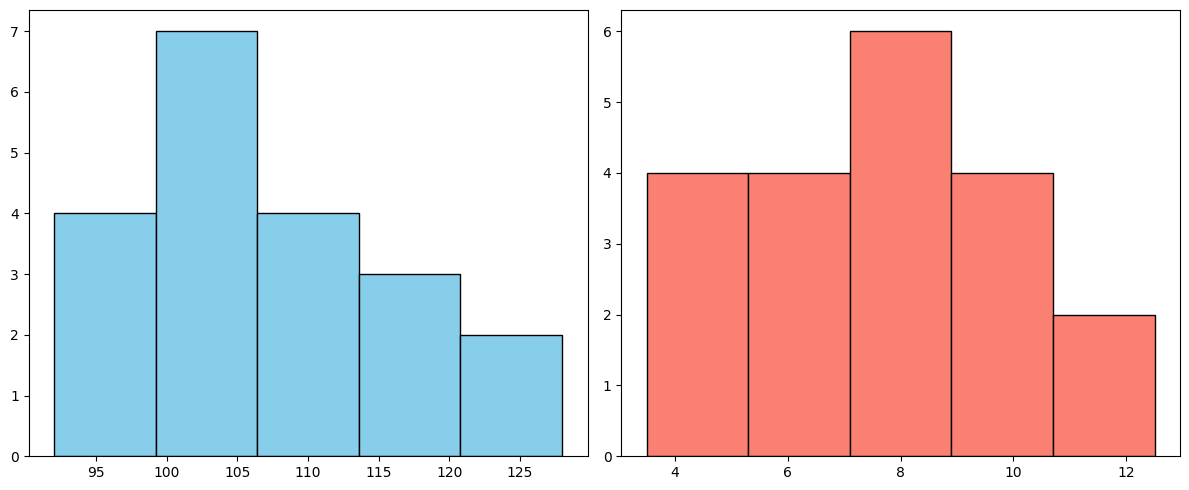

In [76]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(x, bins=5, color='skyblue', edgecolor='black')

plt.subplot(1, 2, 2)
plt.hist(y, bins=5, color='salmon', edgecolor='black')
plt.tight_layout()

plt.show()

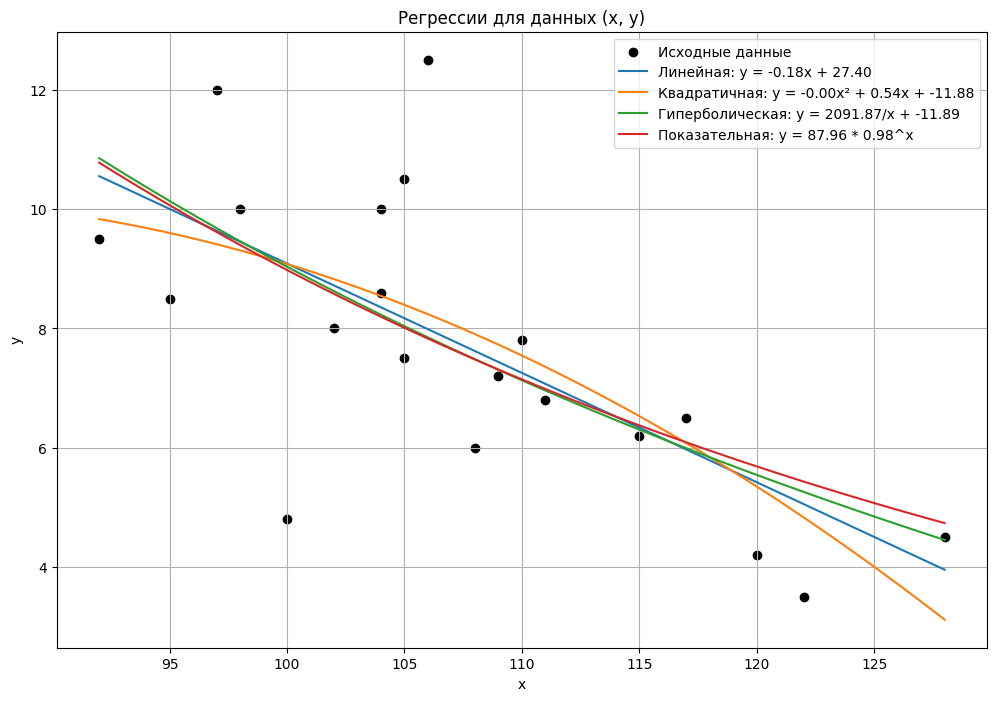

In [81]:
def linear_func(x, w1, w0):
    return w1 * x + w0

def quadratic_func(x, w2, w1, w0):
    return w2 * x**2 + w1 * x + w0

def hyperbolic_func(x, w1, w0):
    return w1 / x + w0

def exponential_func(x, w1, w0):
    return w0 * (w1 ** x)

popt_linear, _ = curve_fit(linear_func, x, y)
popt_quadratic, _ = curve_fit(quadratic_func, x, y)
popt_hyperbolic, _ = curve_fit(hyperbolic_func, x, y)
popt_exponential, _ = curve_fit(exponential_func, x, y)

plt.figure(figsize=(12, 8))
plt.scatter(x, y, label='Исходные данные', color='black')

x_fit = np.linspace(min(x), max(x), 100)
y_fit_linear = linear_func(x_fit, *popt_linear)
y_fit_quadratic = quadratic_func(x_fit, *popt_quadratic)
y_fit_hyperbolic = hyperbolic_func(x_fit, *popt_hyperbolic)
y_fit_exponential = exponential_func(x_fit, *popt_exponential)

plt.plot(x_fit, y_fit_linear, label=f'Линейная: y = {popt_linear[0]:.2f}x + {popt_linear[1]:.2f}')
plt.plot(x_fit, y_fit_quadratic, label=f'Квадратичная: y = {popt_quadratic[0]:.2f}x² + {popt_quadratic[1]:.2f}x + {popt_quadratic[2]:.2f}')
plt.plot(x_fit, y_fit_hyperbolic, label=f'Гиперболическая: y = {popt_hyperbolic[0]:.2f}/x + {popt_hyperbolic[1]:.2f}')
plt.plot(x_fit, y_fit_exponential, label=f'Показательная: y = {popt_exponential[1]:.2f} * {popt_exponential[0]:.2f}^x')

plt.legend()
plt.grid(True)
plt.title('Регрессии для данных (x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()